In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from aeon.visualisation import plot_critical_difference

In [22]:
TARGET_LEN=192
KIND = "multivariate"  # Change to "univariate" if needed
METRIC = "mse"  # Change to "mse" if needed

df = pd.read_json(f"results/{KIND}/{METRIC}.json")


datasets = df.columns.tolist()
contexts = df.index.tolist()

new_df = {}

for ctx_len in contexts:
    subdf = df.loc[ctx_len]
    for dataset in datasets:
        curr_ds = subdf[dataset]
        try:
            curr_ds = curr_ds[str(TARGET_LEN)]
            if dataset not in new_df:
                new_df[dataset] = {}
            for model, mse in curr_ds.items():
                model_name = model + "_" + str(ctx_len)
                new_df[dataset][model_name] = mse
        except:
            continue

df = pd.DataFrame(new_df)


In [23]:
model_names = df.index.str.extract(r'^(.*)_\d+$')[0].values.tolist()
df['model'] = model_names

# Step 2: Group by model and aggregate using first non-NaN per column
merged_df = df.groupby('model').agg(lambda col: col.dropna().iloc[0] if not col.dropna().empty else pd.NA)

# Optional: sort for readability
merged_df = merged_df.sort_index()


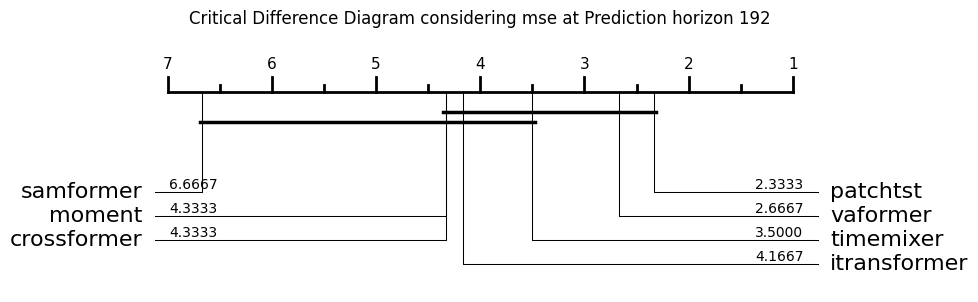

In [24]:
results = merged_df.T
methods = results.columns
plot = plot_critical_difference(results.values, methods, alpha=0.05, width=8, test='nemenyi', lower_better=True)  
plt.title(f"Critical Difference Diagram considering {METRIC} at Prediction horizon {TARGET_LEN}")
plt.savefig(f"pics/{KIND}/{METRIC}_cd_{TARGET_LEN}.png", dpi=300, bbox_inches='tight')